# Clustering redshifts with 21-cm bispectra

Settting basic commands and importing the forecast class (<code>bipz.py</code>).

To run it requires the <code>noise_21cm.py</code> and folder <code>curves_IM</code> in the same directory.

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import time as tm
from time import time, strftime
from bipz import BiPZ

savedir = '/home/caroline/ClusteringZ/results/'

import matplotlib.pyplot as pl

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pl.rc('text', usetex=True)
pl.rc('font', family='serif')
pl.rc('font', size='22')

pl.rcParams['figure.dpi'] = 150
pl.rcParams['xtick.labelsize'] = 18
pl.rcParams['ytick.labelsize'] = 18

[Initialising CLASS]

(Pre-defined cosmology)
('      h:', 0.674)
('    n_s:', 0.965)
('     s8:', 0.811)
('   N_ur:', 2.99)
(' N_ncdm:', 0.0)
('Omega_m:', 0.315)
('      w:', -1.0)


[CLASS Initialised]


Defining the functions $\sigma_P(\theta)$ and $\sigma_B(\theta)$.

In [2]:
def varP_r(z,sig0,kFG,kmax=0.3,wedge='none',window='smooth',IM='HIRAX'):
    
    bpz = BiPZ(redshift=z, sigma_z=sig0, kFG=kFG, window=window, wedge=wedge, b2=False, IM=IM)
    var = bpz.get_VarP(kmax=kmax)
    
    return np.sqrt(var)

def varP_s(z,sig0,kFG,kmax=0.3,wedge='none',window='smooth',IM='HIRAX'):
    
    bpz = BiPZ(redshift=z, sigma_z=sig0, kFG=kFG, window=window, wedge=wedge, b2=False, IM=IM)
    var = bpz.get_VarP(is_sigma=True,kmax=kmax)
    
    return np.sqrt(var)

def varB_r(z,sig0,kFG,window='HS',wedge='none',b2=False,IM='HIRAX',kmax=0.3):

    bpz = BiPZ(redshift=z, sigma_z=sig0, kFG=kFG, wedge=wedge, window=window, b2=b2, IM=IM)
    var = bpz.get_VarB(verbose=False, kmax=kmax)
    return np.sqrt(var)

def varB_s(z,sig0,kFG,window='HS',wedge='none',b2=False,IM='HIRAX',kmax=0.3):

    bpz = BiPZ(redshift=z, sigma_z=sig0, kFG=kFG, wedge=wedge, window=window, b2=b2, IM=IM)
    var = bpz.get_VarB(verbose=False, is_sigma=True, kmax=kmax)
    return np.sqrt(var)

def varPB_r(z,sig0,kFG,window='HS',wedge='none',b2=False,IM='HIRAX',kmax=0.3):

    bpz = BiPZ(redshift=z, sigma_z=sig0, kFG=kFG, wedge=wedge, window=window, b2=b2, IM=IM)
    var = bpz.get_VarPB(verbose=False, kmax=kmax)
    return np.sqrt(var)

def varPB_s(z,sig0,kFG,window='HS',wedge='none',b2=False,IM='HIRAX',kmax=0.3):

    bpz = BiPZ(redshift=z, sigma_z=sig0, kFG=kFG, wedge=wedge, window=window, b2=b2, IM=IM)
    var = bpz.get_VarPB(verbose=False, is_sigma=True, kmax=kmax)
    return np.sqrt(var)

# Section 4.1: mode-loss and mode reconstruction

## Figure 2

Computing the number of modes available to the cross-correlation between both galaxy and HI samples:
\begin{equation}
  N_{\rm modes} = \frac{V}{2\pi^2}\int_0^{k_{\rm max}}{\rm d}{k}_\parallel\int_0^{k_{\rm max}}{\rm d}k_\perp\,\,k_\perp\, {\rm e}^{-{k}_\parallel^2{\sigma_\parallel}^2}\frac{P^2_{gh}({k}_\parallel,\boldsymbol{k}_\perp)}{P_{gg}({k}_\parallel,\boldsymbol{k}_\perp)P_{hh}({k}_\parallel,\boldsymbol{k}_\perp)}
\end{equation}

In [2]:
def get_nmodes(sig0,kFG,z=0.8,kmax=0.3,wedge='none',window='HS',IM='HIRAX'):
    
    bpz = BiPZ(redshift=z, sigma_z=sig0, kFG=kFG, window=window, wedge=wedge, b2=False, IM=IM)
    modes = bpz.get_Nmodes_Pk(kmax=0.3)
    
    return modes

In [3]:
bins = 50
sigs = np.geomspace(1e-3,0.2,bins)
kfgs = np.geomspace(1e-3,0.2,bins)

In [6]:
Nmodes = np.zeros((bins,bins))

for i in range(len(kfgs)):
    Nmodes[i] = np.array([get_nmodes(sig,kfgs[i]) for sig in sigs])
    
np.savetxt(savedir+'nmodes_HIRAX.txt',Nmodes)

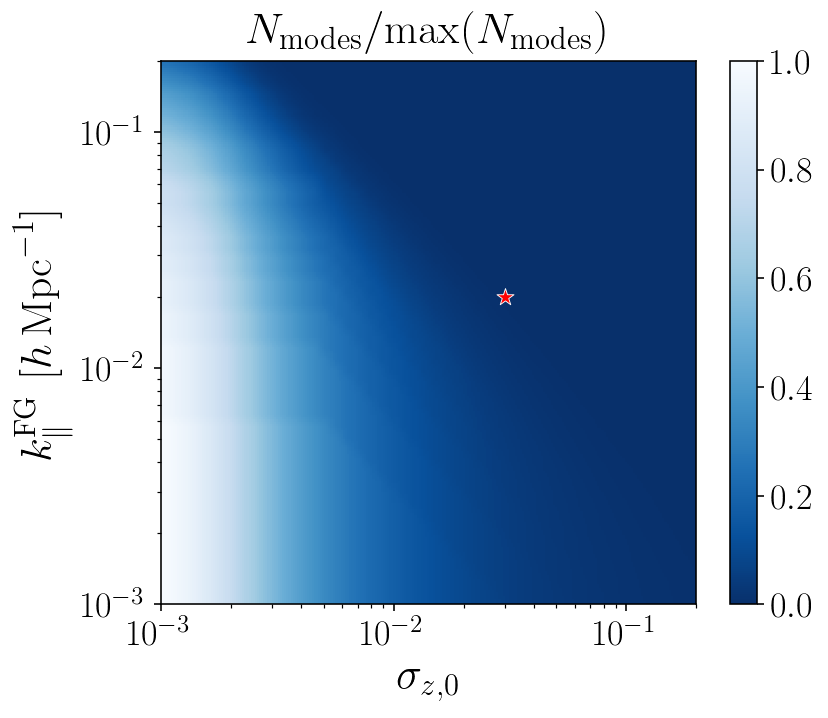

In [34]:
bins = 50
sigs = np.geomspace(1e-3,0.2,bins)
kfgs = np.geomspace(1e-3,0.2,bins)
nmodes = np.loadtxt(savedir+'nmodes_HIRAX.txt')

from scipy.interpolate import interp2d
nmodes_grid = interp2d(sigs, kfgs, nmodes)
SIGS = np.geomspace(sigs[0], sigs[-1], 256)
KFGS = np.geomspace(kfgs[0], kfgs[-1], 256)
nmodes = np.array([[nmodes_grid(SIG, KFG)[0] for SIG in SIGS] for KFG in KFGS])

from matplotlib.pyplot import cm
Blues = (pl.cm.get_cmap('Blues')).reversed()

pl.figure(figsize=(6, 5))
pl.pcolor(SIGS, KFGS, nmodes/np.amax(nmodes), cmap=Blues)
pl.xscale('log')
pl.yscale('log')
pl.colorbar()
pl.scatter(x=0.03,y=0.02,marker='*',s=80,c='r',edgecolors='w',linewidths=0.45)
pl.title(r'$N_{\rm modes}/{\rm max}(N_{\rm modes})$',fontsize=22)
pl.xlabel(r'$\sigma_{z,0}$',fontsize=22)
pl.ylabel(r'$k_\parallel^{\rm FG}\,\,[h\,{\rm Mpc}^{-1}]$',fontsize=22)
# pl.savefig(savedir+'nmodes_HIRAX.png', dpi=400, bbox_inches='tight')

### Plotting

## Figure 3

Power-spectrum (*dotted*) and bispectrum (*solid*) constraints obtained by cross-correlating a **HIRAX-like** (interferometer) survey and a LSST-like, on both Gaussian photo-$z$ parameters, $\theta = {r}_\parallel^*$ (*thick red*) and $\theta = {\sigma}_\parallel$ (*thin blue*), as a function of foreground damping/cut-off scale ${k}_\parallel^{\rm FG}$ (*left, top and bottom*), photo-$z$ scatter $\sigma_0$ (*right, top*), and maximum wavenumber $k_{\rm max}$ (*right, bottom*). A single redshift bin centred at $z=0.8$ is assumed. Linear bias and number density for the photometric galaxies are, respectively, $b \approx 1.4$ and $\bar{n} \approx 0.004$.

**Left plot, bottom panel**: foregrounds are treated via the smooth exponential damping, ${\cal S}_{\rm FG}^{\rm SM}({k}_\parallel) = \left(1-\exp\left[-\frac{{k}_\parallel}{{k}_\parallel^{\rm FG}}\right]\right)$;

In [12]:
kfgs   = np.geomspace(0.003,0.3,10)
SIG    = 0.03
KMAX   = 0.3
Z      = 0.8
WINDOW = 'smooth'
WEDGE  = 'none'

print('Varying kFG. Redshift=%.2f, sig0=%.2f, kmax=%.2f' %(Z,SIG,KMAX))

Varying kFG. Redshift=0.80, sig0=0.03, kmax=0.30


In [13]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((kfgs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_idealised_varkfg.txt',data,header='kFG | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 16:03:37')
    Computing sigma_P(r)


noise_21cm.py:100: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  norm = 0.5*xp['n_dish']*(xp['n_dish']-1.)/quad(ndistint, dist[0], dist[-1])[0]


    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '06-12-2021 16:20:27')


Done


**Left plot, top panel**: foregrounds given by Heaviside model, ${\cal S}_{\rm FG}^{\rm HS}({k}_\parallel) = \Theta_{\rm FG}({k}_\parallel) \equiv \begin{cases} \,\,\, 0, & {k}_\parallel < {k}_\parallel^{\rm min} \\ \,\,\, 1, & {k}_\parallel > {k}_\parallel^{\rm min}\end{cases}$.

In [14]:
WINDOW = 'HS'
WEDGE  = 'none'

print('Varying kFG. Redshift=%.2f, sig0=%.2f, kmax=%.2f' %(Z,SIG,KMAX))

Varying kFG. Redshift=0.80, sig0=0.03, kmax=0.30


In [15]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW) for kfg in kfgs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((kfgs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_idealised_HS_varkfg.txt',data,header='kFG | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 16:20:27')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '06-12-2021 16:37:08')


Done


**Right panels**: only the ${\cal S}_{\rm FG}^{\rm HS}({k}_\parallel)$ modelling. 

In [16]:
KFG    = 0.02
sigs   = np.geomspace(0.01,0.1,10)
KMAX   = 0.3
Z      = 0.8
WINDOW = 'HS'
WEDGE  = 'none'

print('Varying sig0. Redshift=%.2f, kFG=%.2f, kmax=%.2f' %(Z,KFG,KMAX))

Varying sig0. Redshift=0.80, kFG=0.02, kmax=0.30


In [17]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for sig in sigs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for sig in sigs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for sig in sigs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for sig in sigs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((sigs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_idealised_HS_varsig.txt',data,header='sig0 | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 16:37:08')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '06-12-2021 16:53:42')


Done


In [18]:
KFG    = 0.02
SIG    = 0.03
kmaxs  = np.geomspace(1e-2,50,10)
Z      = 0.8
WINDOW = 'HS'
WEDGE  = 'none'

print('Varying kmax. Redshift=%.2f, kFG=%.2f, sig0=%.2f' %(Z,KFG,SIG))

Varying kmax. Redshift=0.80, kFG=0.02, sig0=0.03


In [19]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for km in kmaxs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for km in kmaxs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for km in kmaxs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for km in kmaxs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((kmaxs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_idealised_HS_varkmax.txt',data,header='kmax | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 16:53:42')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '06-12-2021 17:14:12')


Done


### Plotting

Text(2.85,750,'$\\mathcal{S}_{\\rm FG}^{\\rm HS}$')

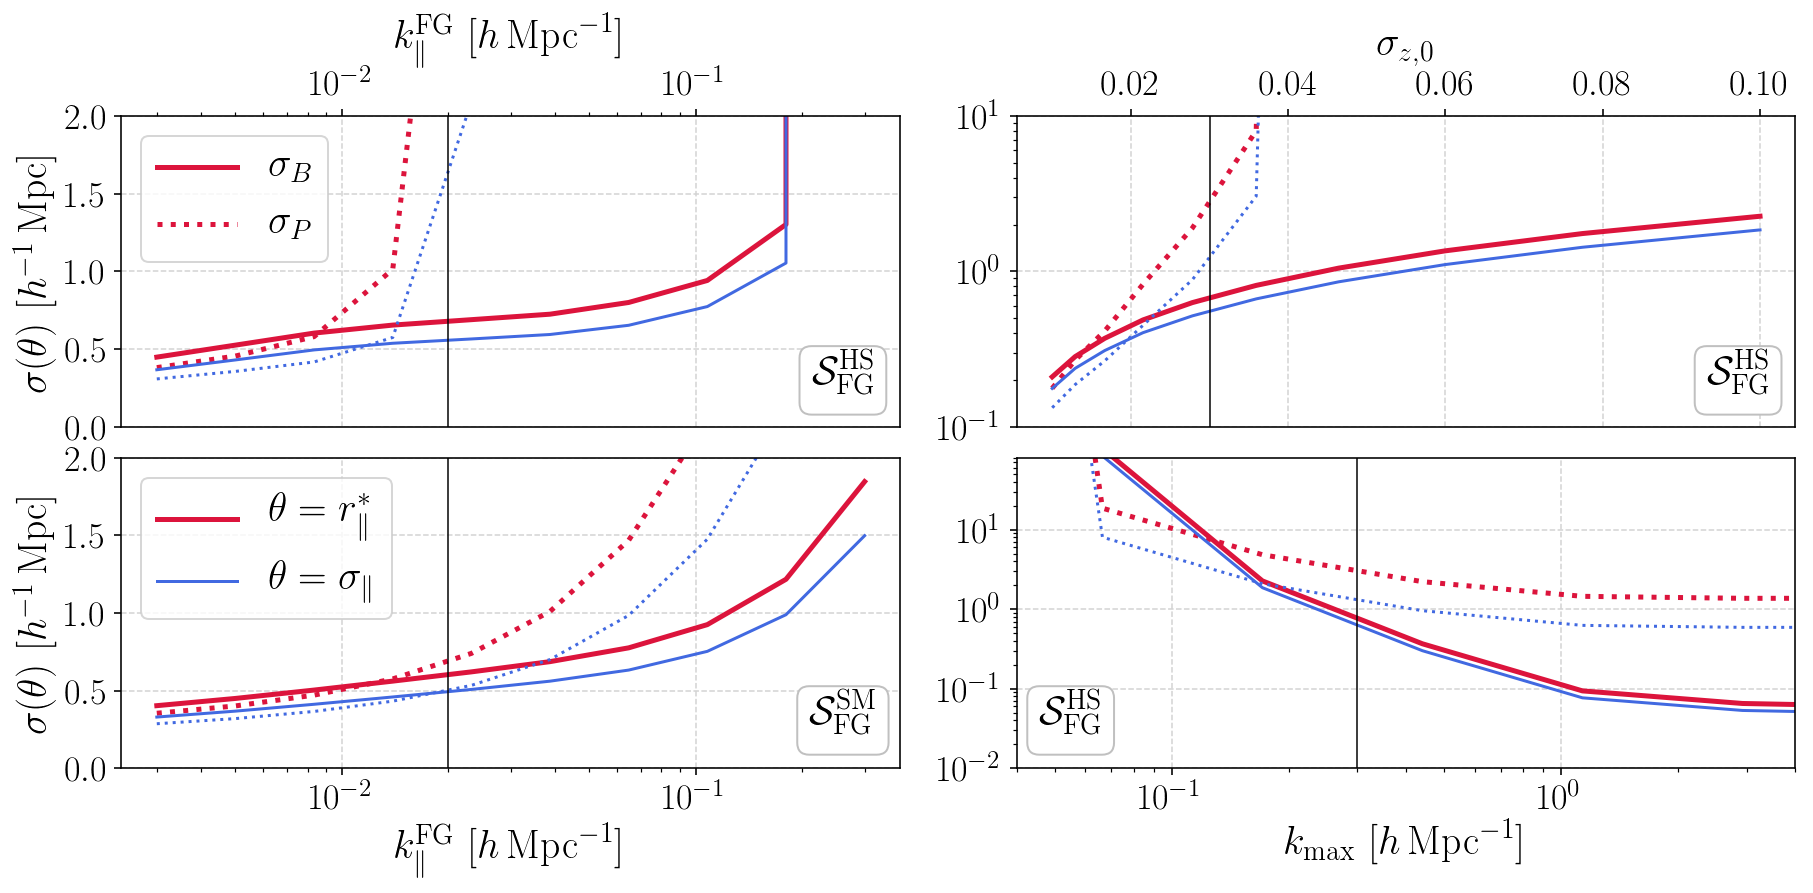

In [30]:
fig = pl.figure(figsize=(15,6))
pl.subplots_adjust(wspace=0.15)
pl.subplots_adjust(hspace=0.10)

#################################### BOTTOM-LEFT: VARYING KFG (HEAVISIDE)
a=fig.add_subplot(2,2,1)
a.xaxis.set_label_position('top') 
a.xaxis.tick_top()
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'HIRAX_idealised_HS_varkfg.txt', unpack=True)
# Just for visualisation #####
tmp = np.where(sigPr==np.inf)
sigPr[tmp]=1e20
tmp = np.where(sigBr==np.inf)
sigBr[tmp]=1e20
tmp = np.where(sigPs==np.inf)
sigPs[tmp]=1e20
tmp = np.where(sigBs==np.inf)
sigBs[tmp]=1e20
##############################
pl.plot(x,sigBr,lw=2.5,c='crimson',label=r'$\sigma_B$')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':',label=r'$\sigma_P$')
pl.plot(x,sigBs,c='royalblue')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.ylabel(r'$\sigma(\theta)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=20)
pl.legend(fontsize=20)
pl.ylim(0,2)
pl.xscale('log')
pl.xlabel(r'$k_\parallel^{\rm FG}\,\,[h\,{\rm Mpc}^{-1}]$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.02,ls='-',c='k',lw=0.75)

#################################### TOP-RIGHT: VARYING SIGMA
a=fig.add_subplot(2,2,2)
a.xaxis.set_label_position('top') 
a.xaxis.tick_top()
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'HIRAX_idealised_HS_varsig.txt', unpack=True)
# Just for visualisation #####
tmp = np.where(sigPr==np.inf)
sigPr[tmp]=1e20
tmp = np.where(sigPs==np.inf)
sigPs[tmp]=1e20
##############################
pl.plot(x,sigBr,lw=2.5,c='crimson')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':')
pl.plot(x,sigBs,c='royalblue')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.yscale('log')
pl.ylim(1e-1,10)
pl.xlabel(r'$\sigma_{z,0}$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.03,ls='-',c='k',lw=0.75)

#################################### BOTTOM-LEFT: VARYING KFG (SMOOTH)
a=fig.add_subplot(2,2,3)
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'HIRAX_idealised_varkfg.txt', unpack=True)
pl.plot(x,sigBr,lw=2.5,c='crimson',label=r'$\theta =r_\parallel^*$')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':')
pl.plot(x,sigBs,c='royalblue',label=r'$\theta =\sigma_\parallel$')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.legend(fontsize=20,loc='upper left')
pl.ylim(0,2)
pl.xscale('log')
pl.xlabel(r'$k_\parallel^{\rm FG}\,\,[h\,{\rm Mpc}^{-1}]$', fontsize=20)
pl.ylabel(r'$\sigma(\theta)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.02,ls='-',c='k',lw=0.75)

#################################### BOTTOM-RIGHT: VARYING KMAX
a=fig.add_subplot(2,2,4)
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'HIRAX_idealised_HS_varkmax.txt', unpack=True)
pl.plot(x,sigBr,lw=2.5,c='crimson')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':')
pl.plot(x,sigBs,c='royalblue')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.xscale('log')
pl.yscale('log')
pl.ylim(1e-2,80)
pl.xlim(4e-2,4)
pl.xlabel(r'$k_{\rm max}\,\,[h\,{\rm Mpc}^{-1}]$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.3,ls='-',c='k',lw=0.75)

pl.text(5.5e-2,4e-2,r'$\mathcal{S}_{\rm FG}^{\rm HS}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

pl.text(1.43e-2,4e-2,r'$\mathcal{S}_{\rm FG}^{\rm SM}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

pl.text(1.43e-2,7.5e2,r'$\mathcal{S}_{\rm FG}^{\rm HS}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

pl.text(2.85,7.5e2,r'$\mathcal{S}_{\rm FG}^{\rm HS}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

# pl.savefig(savedir+'HIRAX_idealised.png', dpi=400, bbox_inches='tight')

## Appendix B (Figure B1)
Same as above, but for SKA (single-dish).

**Left plot, bottom panel**: foregrounds are treated via the smooth exponential damping, ${\cal S}_{\rm FG}^{\rm SM}({k}_\parallel) = \left(1-\exp\left[-\frac{{k}_\parallel}{{k}_\parallel^{\rm FG}}\right]\right)$;

In [3]:
kfgs   = np.geomspace(0.003,0.3,10)
SIG    = 0.03
KMAX   = 0.3
Z      = 0.8
WINDOW = 'smooth'
WEDGE  = 'none'

print('Varying kFG. Redshift=%.2f, sig0=%.2f, kmax=%.2f' %(Z,SIG,KMAX))

Varying kFG. Redshift=0.80, sig0=0.03, kmax=0.30


In [4]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((kfgs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'SKA_idealised_varkfg.txt',data,header='kFG | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 14:58:15')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '06-12-2021 15:14:01')


Done


**Left plot, top panel**: foregrounds given by Heaviside model, ${\cal S}_{\rm FG}^{\rm HS}({k}_\parallel) = \Theta_{\rm FG}({k}_\parallel) \equiv \begin{cases} \,\,\, 0, & {k}_\parallel < {k}_\parallel^{\rm min} \\ \,\,\, 1, & {k}_\parallel > {k}_\parallel^{\rm min}\end{cases}$.

In [5]:
WINDOW = 'HS'
WEDGE  = 'none'

print('Varying kFG. Redshift=%.2f, sig0=%.2f, kmax=%.2f' %(Z,SIG,KMAX))

Varying kFG. Redshift=0.80, sig0=0.03, kmax=0.30


In [6]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,SIG,kfg,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for kfg in kfgs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((kfgs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'SKA_idealised_HS_varkfg.txt',data,header='kFG | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 15:14:01')
    Computing sigma_P(r)


bipz.py:301: RuntimeWarning: divide by zero encountered in double_scalars
  varP = 1./(self.Area*simps(int_FisherP_perp, x=np.log(kperps))/(2.0*np.pi))


    Computing sigma_P(s)
    Computing sigma_B(r)


bipz.py:490: RuntimeWarning: divide by zero encountered in double_scalars
  VarBr = 1.0/(self.Area*simps(integ_1, x=np.log(k1_perps))/(24*np.pi))


    Computing sigma_B(s)
('Finishing at:', '06-12-2021 15:30:11')


Done


**Right panels**: only the ${\cal S}_{\rm FG}^{\rm HS}({k}_\parallel)$ modelling. 

In [7]:
KFG    = 0.02
sigs   = np.geomspace(0.01,0.1,10)
KMAX   = 0.3
Z      = 0.8
WINDOW = 'HS'
WEDGE  = 'none'

print('Varying sig0. Redshift=%.2f, kFG=%.2f, kmax=%.2f' %(Z,KFG,KMAX))

Varying sig0. Redshift=0.80, kFG=0.02, kmax=0.30


In [8]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for sig in sigs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for sig in sigs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for sig in sigs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,sig,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for sig in sigs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((sigs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'SKA_idealised_HS_varsig.txt',data,header='sig0 | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 15:30:11')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '06-12-2021 15:46:00')


Done


In [9]:
KFG    = 0.02
SIG    = 0.03
kmaxs  = np.geomspace(1e-2,50,10)
Z      = 0.8
WINDOW = 'HS'
WEDGE  = 'none'

print('Varying kmax. Redshift=%.2f, kFG=%.2f, sig0=%.2f' %(Z,KFG,SIG))

Varying kmax. Redshift=0.80, kFG=0.02, sig0=0.03


In [10]:
print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW,IM='SKA') for km in kmaxs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW,IM='SKA') for km in kmaxs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW,IM='SKA') for km in kmaxs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(Z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW,IM='SKA') for km in kmaxs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((kmaxs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'SKA_idealised_HS_varkmax.txt',data,header='kmax | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

('Starting at:', '06-12-2021 15:46:00')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '06-12-2021 16:03:35')


Done


### Plotting

Text(0.012,1.9,'$\\mathcal{S}_{\\rm FG}^{\\rm HS}$')

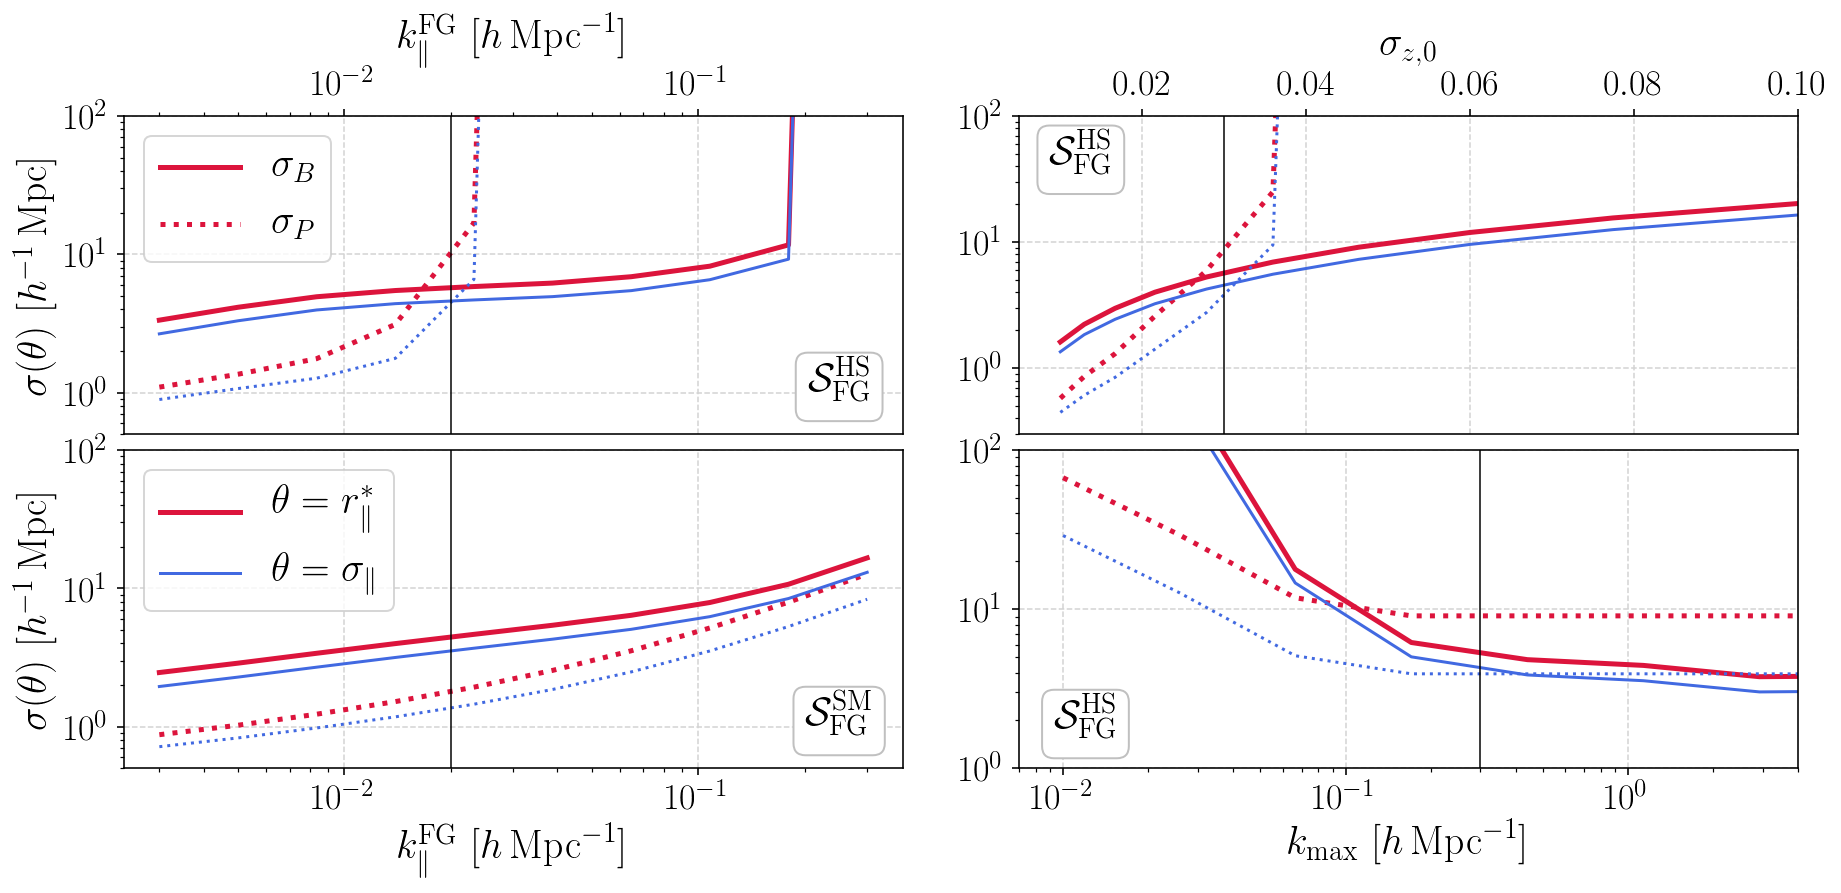

In [31]:
fig = pl.figure(figsize=(15,6))
pl.subplots_adjust(wspace=0.15)
pl.subplots_adjust(hspace=0.05)

#################################### TOP-LEFT: VARYING KFG (HEAVISIDE)
a=fig.add_subplot(2,2,1)
a.xaxis.set_label_position('top')
a.xaxis.tick_top()
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'SKA_idealised_HS_varkfg.txt', unpack=True)
# Just for visualisation #####
tmp = np.where(sigPr==np.inf)
sigPr[tmp]=1e20
tmp = np.where(sigBr==np.inf)
sigBr[tmp]=1e20
tmp = np.where(sigPs==np.inf)
sigPs[tmp]=1e20
tmp = np.where(sigBs==np.inf)
sigBs[tmp]=1e20
##############################
pl.plot(x,sigBr,lw=2.5,c='crimson',label=r'$\sigma_B$')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':',label=r'$\sigma_P$')
pl.plot(x,sigBs,c='royalblue')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.ylabel(r'$\sigma(\theta)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=20)
pl.legend(fontsize=20)
pl.yscale('log')
pl.xscale('log')
pl.ylim(5e-1,1e2)
pl.xlabel(r'$k_\parallel^{\rm FG}\,\,[h\,{\rm Mpc}^{-1}]$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.02,ls='-',c='k',lw=0.75)
pl.text(0.25,1.1,r'$\mathcal{S}_{\rm FG}^{\rm HS}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

#################################### TOP-RIGHT: VARYING SIGMA
a=fig.add_subplot(2,2,2)
a.xaxis.set_label_position('top') 
a.xaxis.tick_top()
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'SKA_idealised_HS_varsig.txt', unpack=True)
# Just for visualisation #####
tmp = np.where(sigPr==np.inf)
sigPr[tmp]=1e20
tmp = np.where(sigPs==np.inf)
sigPs[tmp]=1e20
##############################
pl.plot(x,sigBr,lw=2.5,c='crimson')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':')
pl.plot(x,sigBs,c='royalblue')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.yscale('log')
pl.ylim(3e-1,1e2)
pl.xlim(0.005,0.1)
pl.xlabel(r'$\sigma_{z,0}$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.03,ls='-',c='k',lw=0.75)
pl.text(0.0125,45,r'$\mathcal{S}_{\rm FG}^{\rm HS}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

#################################### BOTTOM-LEFT: VARYING KFG (SMOOTH)
a=fig.add_subplot(2,2,3)
 
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'SKA_idealised_varkfg.txt', unpack=True)
pl.plot(x,sigBr,lw=2.5,c='crimson',label=r'$\theta =r_\parallel^*$')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':')
pl.plot(x,sigBs,c='royalblue',label=r'$\theta =\sigma_\parallel$')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.legend(fontsize=20,loc='upper left')
pl.yscale('log')
pl.xscale('log')
pl.ylim(5e-1,1e2)
pl.xlabel(r'$k_\parallel^{\rm FG}\,\,[h\,{\rm Mpc}^{-1}]$', fontsize=20)
pl.ylabel(r'$\sigma(\theta)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.02,ls='-',c='k',lw=0.75)
pl.text(0.25,1.1,r'$\mathcal{S}_{\rm FG}^{\rm SM}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

#################################### BOTTOM-RIGHT: VARYING KMAX
a=fig.add_subplot(2,2,4)
x,sigPr,sigPs,sigBr,sigBs = np.loadtxt(savedir+'SKA_idealised_HS_varkmax.txt', unpack=True)
x=np.geomspace(1e-2,50,10)
pl.plot(x,sigBr,lw=2.5,c='crimson')
pl.plot(x,sigPr,lw=2.5,c='crimson',ls=':')
pl.plot(x,sigBs,c='royalblue')
pl.plot(x,sigPs,c='royalblue',ls=':')
pl.xscale('log')
pl.yscale('log')
pl.ylim(1,100)
pl.xlim(0.007,4)
pl.xlabel(r'$k_{\rm max}\,\,[h\,{\rm Mpc}^{-1}]$', fontsize=20)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.axvline(x=0.3,ls='-',c='k',lw=0.75)
pl.text(0.0120,1.9,r'$\mathcal{S}_{\rm FG}^{\rm HS}$',fontsize=20,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='silver',
                   fc='white',
                   alpha=1))

# pl.savefig(savedir+'SKA_idealised.png', dpi=400, bbox_inches='tight')

# Section 4.2: forecast for Stage-IV surveys

## Figure 4. Fixed $\sigma_0 = 0.03, k_\parallel^{\rm FG} = 0.02\,h/{\rm Mpc}$ and $k_{\rm max} = 0.3\,h/{\rm Mpc}$.

In [26]:
WINDOW = 'HS'
WEDGE  = 'none'
KFG  = 0.02
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.05),np.log10(0.10),6),np.linspace(0.15,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])
print('    Computing sigma_PB(r)')
sigPB_r = np.array([varPB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])
print('    Computing sigma_PB(s)')
sigPB_s = np.array([varPB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s,sigPB_r,sigPB_s))
np.savetxt(savedir+'SKA_varz_nowedge.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s | sigPB_r | sigPB_s')

print('Done')

sig0=0.03, kmax=0.30, kFG=0.02
('Starting at:', '03-12-2021 19:20:56')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '03-12-2021 19:52:12')


Done


In [27]:
WINDOW = 'HS'
WEDGE  = 'none'
KFG  = 0.02
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.05),np.log10(0.10),6),np.linspace(0.15,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,IM='SKA') for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True,IM='SKA') for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True,IM='SKA') for z in zs])
print('    Computing sigma_PB(r)')
sigPB_r = np.array([varPk_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True,IM='SKA') for z in zs])
print('    Computing sigma_PB(s)')
sigPB_s = np.array([varPk_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True,IM='SKA') for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s,sigPB_r,sigPB_s))
np.savetxt(savedir+'SKA_varz_nowedge_b2.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s | sigPB_r | sigPB_s')

print('Done')

sig0=0.03, kmax=0.30, kFG=0.02
('Starting at:', '03-12-2021 19:52:12')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '03-12-2021 20:22:08')


Done


For HIRAX, we change de redshift array to sample better the range

In [28]:
WINDOW = 'HS'
WEDGE  = 'none'
KFG  = 0.02
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_PB(r)')
sigPB_r = np.array([varPB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_PB(s)')
sigPB_s = np.array([varPB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s,sigPB_r,sigPB_s))
np.savetxt(savedir+'HIRAX_varz_nowedge.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s | sigPB_r | sigPB_s')

print('Done')

sig0=0.03, kmax=0.30, kFG=0.02
('Starting at:', '03-12-2021 20:22:08')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '03-12-2021 20:44:57')


Done


In [29]:
WINDOW = 'HS'
WEDGE  = 'none'
KFG  = 0.02
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])
print('    Computing sigma_PB(r)')
sigPB_r = np.array([varPB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])
print('    Computing sigma_PB(s)')
sigPB_s = np.array([varPB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s,sigPB_r,sigPB_s))
np.savetxt(savedir+'HIRAX_varz_nowedge_b2.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s | sigPB_r | sigPB_s')

print('Done')

sig0=0.03, kmax=0.30, kFG=0.02
('Starting at:', '03-12-2021 20:44:57')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '03-12-2021 21:10:31')


Done


### Plotting

In [8]:
c = 299792.458 #km/s
h = 0.674
ns = 0.965
s8 = 0.811
Om = 0.315
Ob = 0.049
Ok = 0.000
N_ur = 2.99
N_ncdm = 0.0
w = -1.0

from classy import Class

# Initialise CLASS (linear power spectra)
class_settings = {'output': 'mPk', 
                  'lensing': 'no',
                  'h': h, 
                  'n_s': ns,
                  'sigma8': s8, 
                  'Omega_cdm': Om-Ob, 
                  'Omega_b': Ob,
                  'z_max_pk': 5.0,
                  'P_k_max_1/Mpc': 200}
pclass = Class()
pclass.set(class_settings)
pclass.compute()

# Get background quantities
bg       = pclass.get_background()
H        = interp1d(bg['z'],(c/h)*bg['H [1/Mpc]'])

In [17]:
z_interp = np.linspace(0.1,3.0,150)
z_tmp    = np.linspace(0.1,3.0,10)
z_ticks  = [0.0,0.5,1.0,1.5,2.0,2.5,3.0]

cfg = {
    "SKAc" : 'crimson', # colour
    "SKAm" : '^',       # marker
    "SKAw" : 2.5,       # linewidth
    "HIRAXc" : 'royalblue',
    "HIRAXw" : 1.5,
    "none" : '.',       # no wedge
    "hor" : '|',        # horizon
    "pb" : '|'          # primary-beam
}

LSST_Y1_r  = 0.002*(1+z_interp)*c/H(z_interp)
LSST_Y10_r = 0.001*(1+z_interp)*c/H(z_interp)
LSST_Y1_s  = 0.006*(1+z_interp)*c/H(z_interp)
LSST_Y10_s = 0.003*(1+z_interp)*c/H(z_interp)

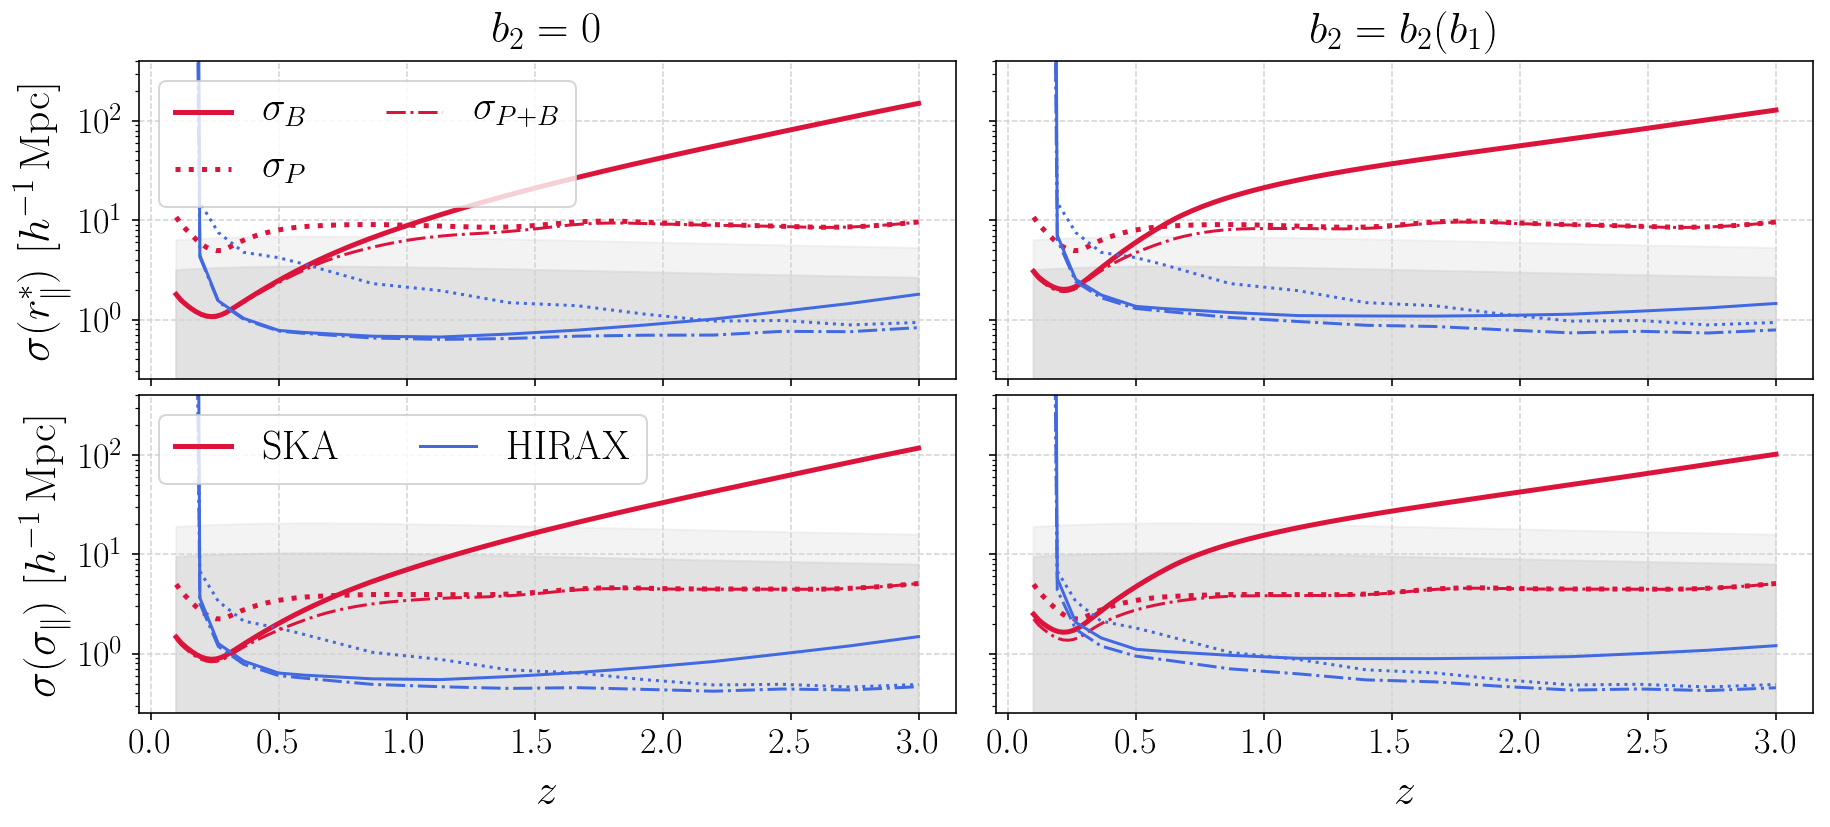

In [31]:
z_interp = np.linspace(0.1,3.0,150)
z_ticks  = [0.0,0.5,1.0,1.5,2.0,2.5,3.0]

fig = pl.figure(figsize=(15,6))
pl.subplots_adjust(wspace=0.05)
pl.subplots_adjust(hspace=0.05)

a=fig.add_subplot(2,2,1)
a.xaxis.set_tick_params(labelbottom=False)
pl.fill_between(z_interp, LSST_Y1_r,color='lightgrey',alpha=0.25)
pl.fill_between(z_interp, LSST_Y10_r,color='lightgrey',alpha=0.5)

pl.title(r'$b_2 = 0$',fontsize=22)

zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'SKA_varz_nowedge.txt',unpack=True)
fsigP_r = interp1d(zs,sigP_r,kind='quadratic')
fsigB_r = interp1d(zs,sigB_r,kind='quadratic')
pl.plot(z_interp,fsigB_r(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"],label=r'$\sigma_B$')
pl.plot(z_interp,fsigP_r(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"],ls=':',label=r'$\sigma_P$')
zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'HIRAX_varz_nowedge.txt',unpack=True)
pl.plot(zs,sigB_r,'-',c=cfg["HIRAXc"])
pl.plot(zs,sigP_r,':',c=cfg["HIRAXc"])

zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'SKA_PB_varz_nowedge.txt',unpack=True)
fsigPB_r = interp1d(zs,sigPB_r,kind='quadratic')
pl.plot(z_interp,fsigPB_r(z_interp),'-.',c=cfg["SKAc"],label=r'$\sigma_{P+B}$')
zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'HIRAX_PB_varz_nowedge.txt',unpack=True)
pl.plot(zs,sigPB_r,'-.',c=cfg["HIRAXc"])

pl.yscale('log')
pl.ylim(0.25,4e2)
pl.xticks(z_ticks)
pl.ylabel(r'$\sigma(r_\parallel^*)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.legend(fontsize=20,loc='upper left',ncol=2,handlelength=1.4)


a=fig.add_subplot(2,2,2)
a.xaxis.set_tick_params(labelbottom=False)
a.yaxis.set_tick_params(labelleft=False)
pl.fill_between(z_interp, LSST_Y1_r,color='lightgrey',alpha=0.25)
pl.fill_between(z_interp, LSST_Y10_r,color='lightgrey',alpha=0.5)

pl.title(r'$b_2 = b_2(b_1)$',fontsize=22)

zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'SKA_varz_nowedge_b2.txt',unpack=True)
fsigP_r = interp1d(zs,sigP_r,kind='quadratic')
fsigB_r = interp1d(zs,sigB_r,kind='quadratic')
pl.plot(z_interp,fsigB_r(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"],label=r'$\sigma_B$')
pl.plot(z_interp,fsigP_r(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"],ls=':',label=r'$\sigma_P$')

zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'HIRAX_varz_nowedge_b2.txt',unpack=True)
pl.plot(zs,sigB_r,'-',c=cfg["HIRAXc"])
pl.plot(zs,sigP_r,':',c=cfg["HIRAXc"])

zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'SKA_PB_varz_nowedge_b2.txt',unpack=True)
fsigPB_r = interp1d(zs,sigPB_r,kind='quadratic')
pl.plot(z_interp,fsigPB_r(z_interp),'-.',c=cfg["SKAc"])
zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'HIRAX_PB_varz_nowedge_b2.txt',unpack=True)
pl.plot(zs,sigPB_r,'-.',c=cfg["HIRAXc"])

pl.yscale('log')
pl.ylim(0.25,4e2)
pl.xticks(z_ticks)
pl.grid(ls='--',c='lightgrey',lw=0.75)

a=fig.add_subplot(2,2,3)
pl.fill_between(z_interp, LSST_Y1_s,color='lightgrey',alpha=0.25)
pl.fill_between(z_interp, LSST_Y10_s,color='lightgrey',alpha=0.5)

zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'SKA_varz_nowedge.txt',unpack=True)
fsigP_s = interp1d(zs,sigP_s,kind='quadratic')
fsigB_s = interp1d(zs,sigB_s,kind='quadratic')
pl.plot(z_interp,fsigB_s(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"],label='SKA')
pl.plot(z_interp,fsigP_s(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"],ls=':')

zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'HIRAX_varz_nowedge.txt',unpack=True)
pl.plot(zs,sigB_s,'-',c=cfg["HIRAXc"],label='HIRAX')
pl.plot(zs,sigP_s,':',c=cfg["HIRAXc"])

zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'SKA_PB_varz_nowedge.txt',unpack=True)
fsigPB_s= interp1d(zs,sigPB_s,kind='quadratic')
pl.plot(z_interp,fsigPB_s(z_interp),'-.',c=cfg["SKAc"])

zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'HIRAX_PB_varz_nowedge.txt',unpack=True)
pl.plot(zs,sigPB_s,'-.',c=cfg["HIRAXc"])

pl.legend(fontsize=20,loc='upper left',ncol=2,handlelength=1.4)
pl.yscale('log')
pl.ylim(0.25,4e2)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.ylabel(r'$\sigma(\sigma_\parallel)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)

a=fig.add_subplot(2,2,4)
a.yaxis.set_tick_params(labelleft=False)
pl.fill_between(z_interp, LSST_Y1_s,color='lightgrey',alpha=0.25)
pl.fill_between(z_interp, LSST_Y10_s,color='lightgrey',alpha=0.5)

zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'SKA_varz_nowedge_b2.txt',unpack=True)
fsigP_s = interp1d(zs,sigP_s,kind='quadratic')
fsigB_s = interp1d(zs,sigB_s,kind='quadratic')
pl.plot(z_interp,fsigB_s(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"])
pl.plot(z_interp,fsigP_s(z_interp),lw=cfg["SKAw"],c=cfg["SKAc"],ls=':')

zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'SKA_PB_varz_nowedge_b2.txt',unpack=True)
fsigPB_s = interp1d(zs,sigPB_s,kind='quadratic')
pl.plot(z_interp,fsigPB_s(z_interp),'-.',c=cfg["SKAc"])

zs,sigP_r,sigP_s,sigB_r,sigB_s = np.loadtxt(savedir+'HIRAX_varz_nowedge_b2.txt',unpack=True)
pl.plot(zs,sigB_s,'-',c=cfg["HIRAXc"])
pl.plot(zs,sigP_s,':',c=cfg["HIRAXc"])

zs,sigPB_r,sigPB_s = np.loadtxt(savedir+'HIRAX_PB_varz_nowedge_b2.txt',unpack=True)
pl.plot(zs,sigPB_s,'-.',c=cfg["HIRAXc"])

pl.yscale('log')
pl.ylim(0.25,4e2)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)

# pl.savefig(savedir+'forecast_nowedge.png', dpi=400, bbox_inches='tight')

## Figure 5. Impact of $\sigma_{z,0}$ on the HIRAX forecast.

### $\sigma_{z,0} = 0.05$

In [11]:
WINDOW = 'HS'
WEDGE  = 'none'
KFG  = 0.02
SIG  = 0.05
KMAX = 0.3

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])
print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_varz_nowedge_sig05_b2.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

sig0=0.05, kmax=0.30, kFG=0.02
('Starting at:', '09-12-2021 20:47:22')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)


KeyboardInterrupt: 

### $\sigma_{z,0} = 0.02$

In [ ]:
WINDOW = 'HS'
WEDGE  = 'none'
KFG  = 0.02
SIG  = 0.02
KMAX = 0.3

zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_varz_nowedge_sig02_b2.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

### Plotting

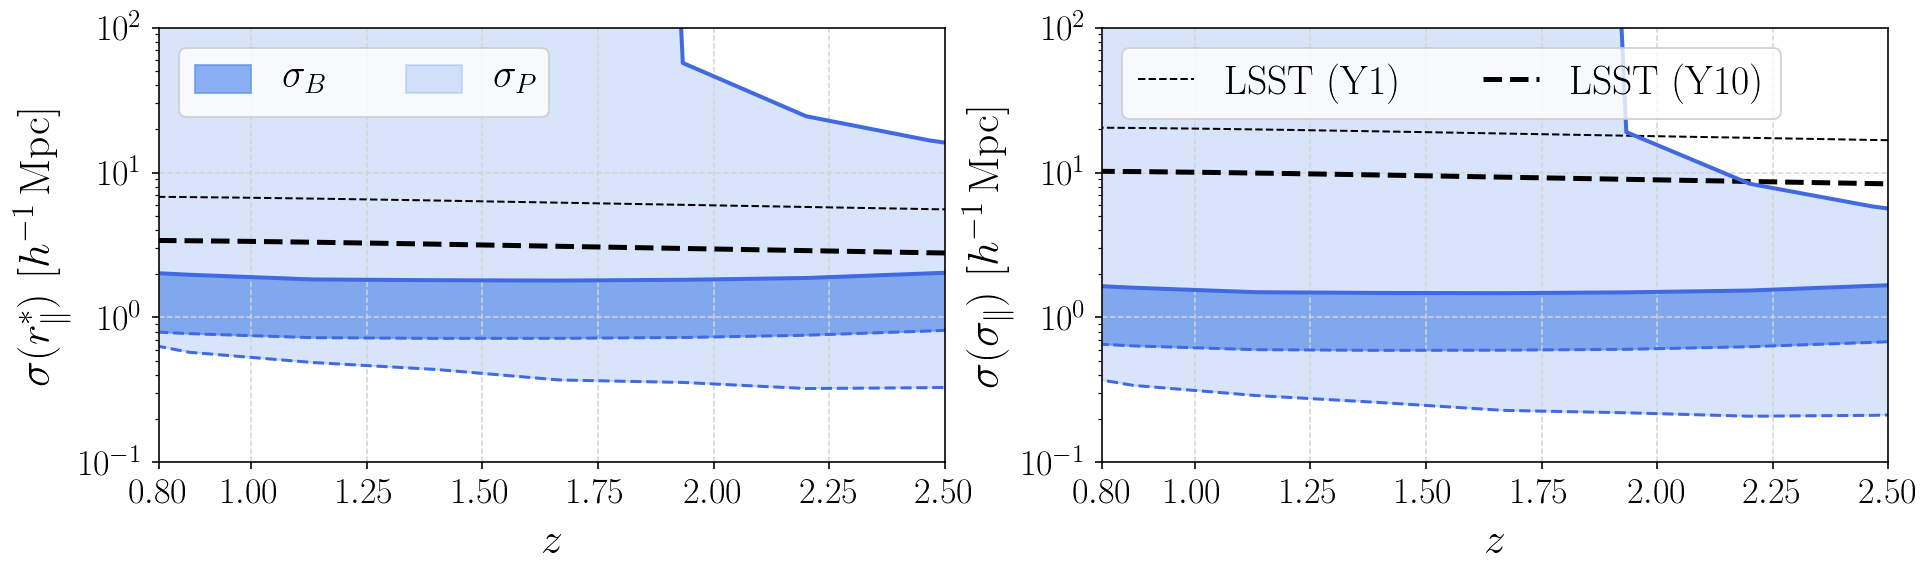

In [35]:
z_interp = np.linspace(0.1,3.0,150)
z_ticks  = [0.8,1.0,1.25,1.5,1.75,2,2.25,2.5]

fig = pl.figure(figsize=(15.5,4))
pl.subplots_adjust(wspace=0.2)
pl.subplots_adjust(hspace=0.05)

zs,sigP02_r,sigP02_s,sigB02_r,sigB02_s = np.loadtxt(savedir+'HIRAX_varz_nowedge_sig02_b2.txt',unpack=True)
zs,sigP05_r,sigP05_s,sigB05_r,sigB05_s = np.loadtxt(savedir+'HIRAX_varz_nowedge_sig05_b2.txt',unpack=True)

# PARAMETER: r_parallel
a=fig.add_subplot(1,2,1)

# Bispectrum
pl.fill_between(zs, sigB02_r,sigB05_r,color='cornflowerblue',alpha=0.75,label=r'$\sigma_B$')

# Power spectrum
pos = np.where(sigP05_r == np.inf)[0]
sigP05_r[pos] = 1e20
pl.fill_between(zs, sigP02_r,sigP05_r,color='cornflowerblue',alpha=0.25,label=r'$\sigma_P$')

pl.plot(zs,sigB02_r,lw=1.5,ls='--',c='royalblue',alpha=1)
pl.plot(zs,sigB05_r,lw=2,ls='-',c='royalblue',alpha=1)
pl.plot(zs,sigP02_r,lw=1.5,ls='--',c='royalblue',alpha=1)
pl.plot(zs,sigP05_r,lw=2,ls='-',c='royalblue',alpha=1)

# LSST requirement
pl.plot(z_interp, LSST_Y1_r,c='k',lw=1,ls='--')
pl.plot(z_interp, LSST_Y10_r,c='k',lw=2.5,ls='--')

# Final settings
pl.yscale('log')
pl.ylim(0.1,1e2)
pl.xlim(0.8,2.5)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.ylabel(r'$\sigma(r_\parallel^*)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.legend(fontsize=20,loc='upper left',ncol=2,handlelength=1.4)

# PARAMETER: sigma
a=fig.add_subplot(1,2,2)

# LSST requirement
pl.plot(z_interp, LSST_Y1_s,c='k',lw=1,ls='--',label=r'LSST (Y1)')
pl.plot(z_interp, LSST_Y10_s,c='k',lw=2.5,ls='--',label=r'LSST (Y10)')

# Bispectrum
pl.fill_between(zs, sigB02_s,sigB05_s,color='cornflowerblue',alpha=0.75)

# Power spectrum
pos = np.where(sigP05_s == np.inf)[0]
sigP05_s[pos] = 1e20
pl.fill_between(zs, sigP02_s,sigP05_s,color='cornflowerblue',alpha=0.25)

pl.plot(zs,sigB02_s,lw=1.5,ls='--',c='royalblue',alpha=1)#,label=r'$\sigma_0 = 0.02$')
pl.plot(zs,sigB05_s,lw=2,ls='-',c='royalblue',alpha=1)#,label=r'$\sigma_0 = 0.05$')
pl.plot(zs,sigP02_s,lw=1.5,ls='--',c='royalblue',alpha=1)
pl.plot(zs,sigP05_s,lw=2,ls='-',c='royalblue',alpha=1)

pl.legend(fontsize=20,loc='upper left',ncol=2,handlelength=1.4)
pl.yscale('log')
pl.ylim(0.1,1e2)
pl.xlim(0.8,2.5)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.ylabel(r'$\sigma(\sigma_\parallel)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)

# pl.savefig(savedir+'forecast_HIRAX_sig0.png', dpi=400, bbox_inches='tight')

## Figure 6. Impact of horizon wedge on the HIRAX forecast.

In [14]:
WINDOW = 'HS'
WEDGE  = 'hor'
KFG  = 0.02
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_varz_hor_b2.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

sig0=0.03, kmax=0.30, kFG=0.02
('Starting at:', '09-12-2021 20:48:37')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '09-12-2021 21:17:27')


Done


In [24]:
WINDOW = 'HS'
WEDGE  = 'hor'
KFG  = 0.02
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=KMAX,wedge=WEDGE,window=WINDOW) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_varz_hor.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

sig0=0.03, kmax=0.30, kFG=0.02
('Starting at:', '09-12-2021 21:33:35')
    Computing sigma_P(r)
    Computing sigma_P(s)
    Computing sigma_B(r)
    Computing sigma_B(s)
('Finishing at:', '09-12-2021 22:00:07')


Done


### Plotting

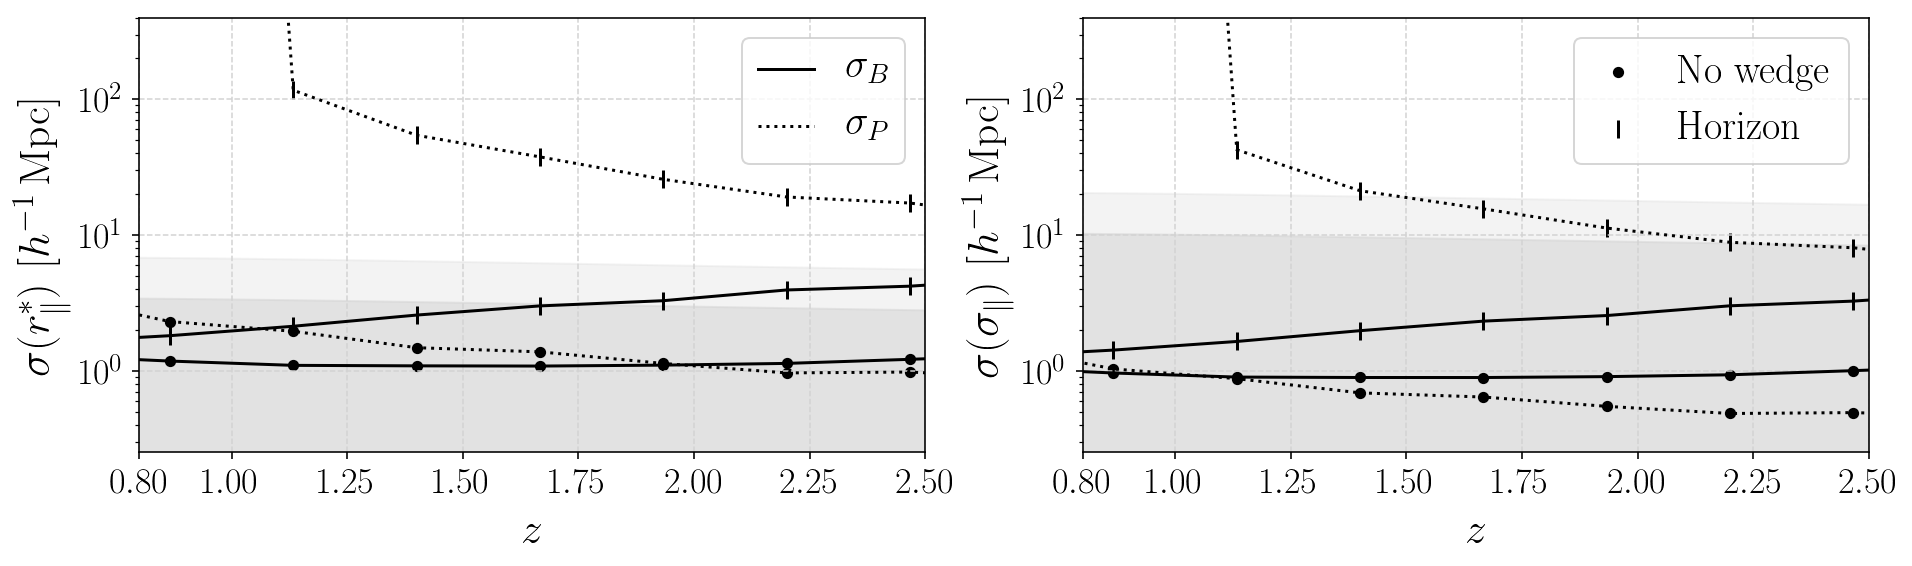

In [36]:
z_interp = np.linspace(0.1,3.0,150)
z_ticks  = [0.8,1.0,1.25,1.5,1.75,2,2.25,2.5]

fig = pl.figure(figsize=(15.5,4))
pl.subplots_adjust(wspace=0.2)
pl.subplots_adjust(hspace=0.05)

zs,sigP_r_nw,sigP_s_nw,sigB_r_nw,sigB_s_nw = np.loadtxt(savedir+'HIRAX_varz_nowedge_b2.txt',unpack=True)
zs,sigP_r_hr,sigP_s_hr,sigB_r_hr,sigB_s_hr = np.loadtxt(savedir+'HIRAX_varz_hor_b2.txt',unpack=True)

# PARAMETER: r_parallel

a=fig.add_subplot(1,2,1)

# LSST requirement
pl.fill_between(z_interp, LSST_Y1_r,color='lightgrey',alpha=0.25)
pl.fill_between(z_interp, LSST_Y10_r,color='lightgrey',alpha=0.5)

# NO WEDGE
pl.plot(zs,sigB_r_nw,c='k',label=r'$\sigma_B$')
pl.plot(zs,sigP_r_nw,c='k',ls=':',label=r'$\sigma_P$')
pl.scatter(zs,sigB_r_nw,marker=cfg["none"],s=85,c='k')
pl.scatter(zs,sigP_r_nw,marker=cfg["none"],s=85,c='k')
# HORIZON
pl.plot(zs,sigB_r_hr,c='k')
pl.plot(zs,sigP_r_hr,c='k',ls=':')
pl.scatter(zs,sigB_r_hr,marker=cfg["hor"],s=75,c='k')
pl.scatter(zs,sigP_r_hr,marker=cfg["hor"],s=75,c='k')

# Final settings
pl.yscale('log')
pl.ylim(0.25,4e2)
pl.xlim(0.8,2.5)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.ylabel(r'$\sigma(r_\parallel^*)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.legend(fontsize=20,loc='upper right',handlelength=1.4)

# PARAMETER: sigma

a=fig.add_subplot(1,2,2)

# LSST requirement
pl.fill_between(z_interp, LSST_Y1_s,color='lightgrey',alpha=0.25)
pl.fill_between(z_interp, LSST_Y10_s,color='lightgrey',alpha=0.5)

# NO WEDGE
pl.plot(zs,sigB_s_nw,c='k')
pl.plot(zs,sigP_s_nw,c='k',ls=':')
pl.scatter(zs,sigB_s_nw,marker=cfg["none"],s=85,c='k',label='No wedge')
pl.scatter(zs,sigP_s_nw,marker=cfg["none"],s=85,c='k')
# HORIZON
pl.plot(zs,sigB_s_hr,c='k')
pl.plot(zs,sigP_s_hr,c='k',ls=':')
pl.scatter(zs,sigB_s_hr,marker=cfg["hor"],s=75,c='k',label='Horizon')
pl.scatter(zs,sigP_s_hr,marker=cfg["hor"],s=75,c='k')

pl.legend(fontsize=20,loc='upper right',handlelength=1.4)
pl.yscale('log')
pl.ylim(0.25,4e2)
pl.xlim(0.8,2.5)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.ylabel(r'$\sigma(\sigma_\parallel)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)

# pl.savefig(savedir+'forecast_HIRAX_wedges.png', dpi=400, bbox_inches='tight')

## Figure 7. Impact of pb wedge on the HIRAX forecast $(k_{\rm FG} \approx 0)$.

In [ ]:
WINDOW = 'HS'
WEDGE  = 'none'
KFG  = 1e-10
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_varz_nowedge_noFG_b2.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

In [ ]:
WINDOW = 'HS'
WEDGE  = 'pb'
KFG  = 1e-10
SIG  = 0.03
KMAX = 0.3
zs   = np.concatenate([np.logspace(np.log10(0.14),np.log10(0.5),5),np.linspace(0.6,3,10)])

print('sig0=%.2f, kmax=%.2f, kFG=%.2f' %(SIG,KMAX,KFG))

print('Starting at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))

print('    Computing sigma_P(r)')
sigP_r = np.array([varP_r(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_P(s)')
sigP_s = np.array([varP_s(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW) for z in zs])
print('    Computing sigma_B(r)')
sigB_r = np.array([varB_r(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])
print('    Computing sigma_B(s)')
sigB_s = np.array([varB_s(z,SIG,KFG,kmax=km,wedge=WEDGE,window=WINDOW,b2=True) for z in zs])

print('Finishing at:', strftime("%d-%m-%Y %H:%M:%S", tm.localtime()))
print('\n')

data = np.column_stack((zs,sigP_r,sigP_s,sigB_r,sigB_s))
np.savetxt(savedir+'HIRAX_varz_pb_noFG_b2.txt',data,header='Redshift | sigP_r | sigP_s | sigB_r | sigB_s')

print('Done')

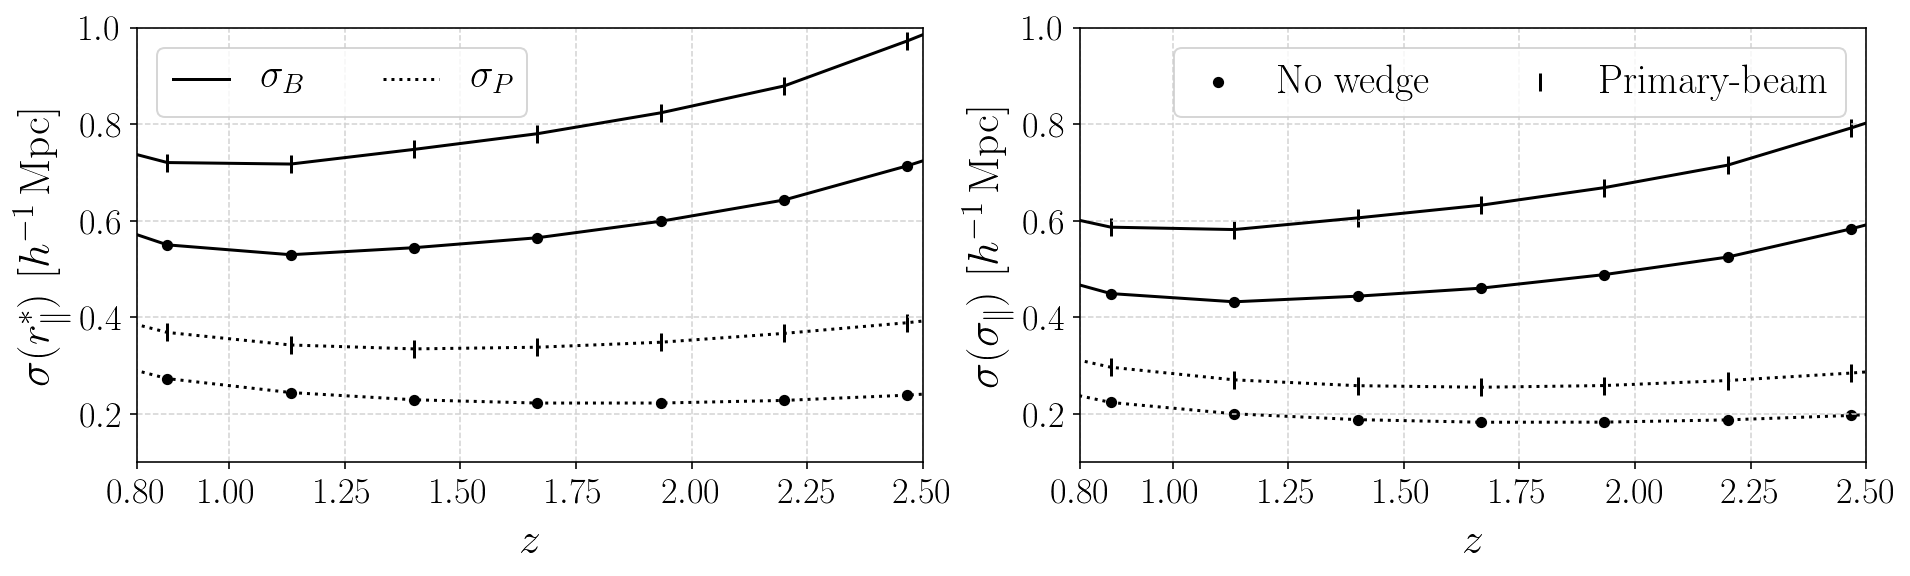

In [37]:
z_interp = np.linspace(0.1,3.0,150)
z_ticks  = [0.8,1.0,1.25,1.5,1.75,2,2.25,2.5]

fig = pl.figure(figsize=(15.5,4))
pl.subplots_adjust(wspace=0.2)
pl.subplots_adjust(hspace=0.05)

zs,sigP_r_nw,sigP_s_nw,sigB_r_nw,sigB_s_nw = np.loadtxt(savedir+'HIRAX_varz_nowedge_noFG_b2.txt',unpack=True)
zs,sigP_r_pb,sigP_s_pb,sigB_r_pb,sigB_s_pb = np.loadtxt(savedir+'HIRAX_varz_pb_noFG_b2.txt',unpack=True)

# PARAMETER: r_parallel
a=fig.add_subplot(1,2,1)

# NO WEDGE
pl.plot(zs,sigB_r_nw,c='k',label=r'$\sigma_B$')
pl.plot(zs,sigP_r_nw,c='k',ls=':',label=r'$\sigma_P$')
pl.scatter(zs,sigB_r_nw,marker=cfg["none"],s=85,c='k')
pl.scatter(zs,sigP_r_nw,marker=cfg["none"],s=85,c='k')

# PRIMARY-BEAM
pl.plot(zs,sigB_r_pb,c='k')
pl.plot(zs,sigP_r_pb,c='k',ls=':')
pl.scatter(zs,sigB_r_pb,marker=cfg["pb"],s=75,c='k')
pl.scatter(zs,sigP_r_pb,marker=cfg["pb"],s=75,c='k')

# Final settings
pl.ylim(0.1,1)
pl.xlim(0.8,2.5)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.ylabel(r'$\sigma(r_\parallel^*)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)
pl.legend(fontsize=20,loc='upper left',ncol=2, handlelength=1.4)

# PARAMETER: sigma
a=fig.add_subplot(1,2,2)

# NO WEDGE
pl.plot(zs,sigB_s_nw,c='k')
pl.plot(zs,sigP_s_nw,c='k',ls=':')
pl.scatter(zs,sigB_s_nw,marker=cfg["none"],s=85,c='k',label='No wedge')
pl.scatter(zs,sigP_s_nw,marker=cfg["none"],s=85,c='k')
# PRIMARY-BEAM
pl.plot(zs,sigB_s_pb,c='k')
pl.plot(zs,sigP_s_pb,c='k',ls=':')
pl.scatter(zs,sigB_s_pb,marker=cfg["pb"],s=75,c='k',label='Primary-beam')
pl.scatter(zs,sigP_s_pb,marker=cfg["pb"],s=75,c='k')


pl.legend(fontsize=20,loc='upper right',ncol=2,handlelength=1.4)
pl.ylim(0.1,1)
pl.xlim(0.8,2.5)
pl.xticks(z_ticks)
pl.xlabel(r'$z$', fontsize=22)
pl.ylabel(r'$\sigma(\sigma_\parallel)\,\,[h^{-1}\,{\rm Mpc}]$', fontsize=22)
pl.grid(ls='--',c='lightgrey',lw=0.75)

# pl.savefig(savedir+'forecast_HIRAX_noFG.png', dpi=400, bbox_inches='tight')